# GP2 Tutorial - Module 1 - Introduction and Demo

`GP2 ❤️ Open Science 😍`

- **Module:** GP2 Demo
- **Authors:** Sara Bandres-Ciga, Hampton Leonard, and Mary Makarious on behalf of the Global Parkinson's Genetics Program
- **Estimated Computation and Runtime:** 
    - **Estimated Specifications:** Default; 1 CPU, 3.75 GB Memory, 50 GB Persistent Disk Size
    - **Estimated Runtime:** 20 min.
- **Date Last Updated:** 02-AUG-2022
    - **Update Description:** Updated notebook to GP2 release 2 files 
---
### Quick Description
These notebooks serve as a beginner's introduction to Terra, GP2, and AMP-PD data to help you get comfortable navigating the spaces, manage your costs, upload your own data, and begin running some simple analyses.


### Course Summary
- **Module 1:** Intro + demo Terra **(this notebook!)**
- **Module 2:** Introduction to current AMP and GP2 data + managing costs
- **Module 3:** How to upload, access, and copy over data 
- **Module 4:** How to interact with clinical data + make mini covariate files
- **Module 5:** Analysis example 1: Run PRS with PD known hits in Non-Euro pops and data viz + save results
- **Module 6:** Analysis example 2: How to extract a gene, annotate it, run burden, and get hmz and compound hets + save results
- **Module 7:** WDL workflows: What they are + When to use + Quick example overview

--- 
## Notebook Summary 
- Getting Started
- Data Overview
- Functions

## Workflow

### [Getting Started](#1)
This section goes through: 
- What is Terra?
- Introduction to Jupyter Notebooks and Languages 
- Introduction to Virtual Machines and Docker Images 

### [Data Overview](#2)
- Quick overview access AMP-PD data
- Quick overview of AMP-PD resources
- Quick overview of GP2 data
- Quick overview of GP2 resources

### [Functions](#3)
This section goes through:
- Functions to Copy/Paste for your Projects



---
<a id="1"></a>
# Getting Started 

## What is Terra?

Terra, the Cloud and you!

This is a visual representation of the environment Terra operates in. 

- The data exists in different "buckets" in the cloud, which Terra can access for you
- Terra is the platform between the cloud and the user, so you can access the data in the buckets
- Terra has a mix of code and markdown cells you can run

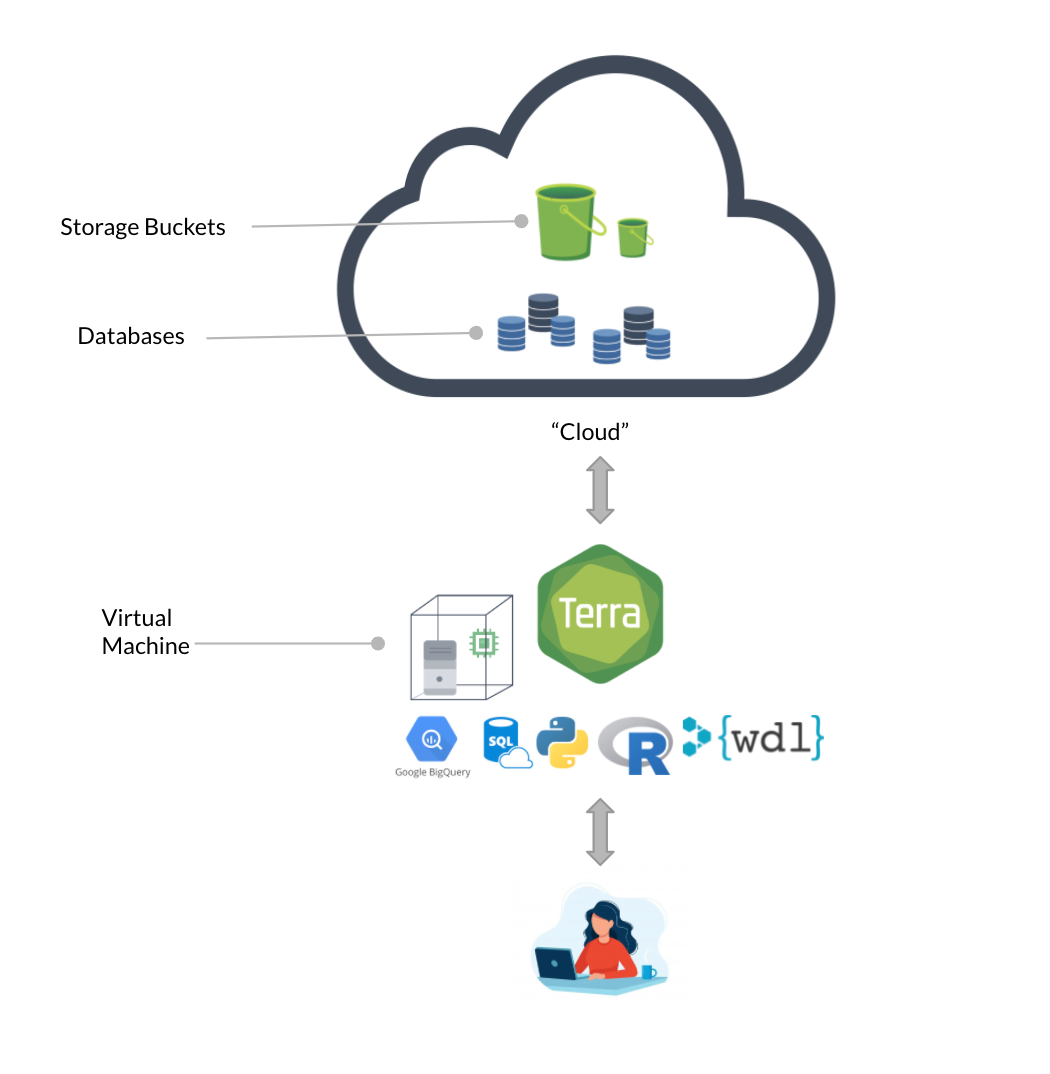


### Important Things to Remember 
- You cannot download data
- You need to start a VM to copy data over
- You can upload your own data, and that stays in your bucket
- Only other people in your workspaces and billing project can access the data in your bucket
- You pay for analyses 
- For analyses that last hours, you want to submit a WDL

More will be covered in **Module 2** of this series.

Additionally, if you're interested in a more in-depth introduction using AMP-PD data after today, GP2 has an introduction in the training portal. 

## Introduction to Jupyter Notebooks and Languages

A more in-depth introduction to Jupyter Notebooks, how you as the user interact with Terra, can be found [here](https://realpython.com/jupyter-notebook-introduction/)

## Highlights 
- Each cell has a type, and is either a code, Markdown (normal text/content, like this one) 
- Like this notebook, you can add images, links in Markdown cells
- You can program in any of the following languages in a Jupyter notebook (once set up properly)
    - Python (will see in analysis modules)
    - R (will see in analysis modules)
    - bash (will see in analysis modules)
    - WDL (will introduce in last module) 
    - SQL/BigQuery
- You can save your notebook as an .ipynb (native format) or HTML (can open in a browser)

## Introduction to Virtual Machines

A virtual machine is a virtual environment that works like a computer inside a computer. 

This means the host computer can be somewhere, and you can be somewhere else interacting with it through a virtual machine as a guest. 

We work within these virtual machines here on Terra, and depending on how large your analysis is and how large the data you're working with - the requirements for your virtual machine will change to accomodate your needs. 

More information on **Module 2** about virtual machines, needs, and cost.

# Data Overview 

## Why Use AMP-PD and GP2 Together?

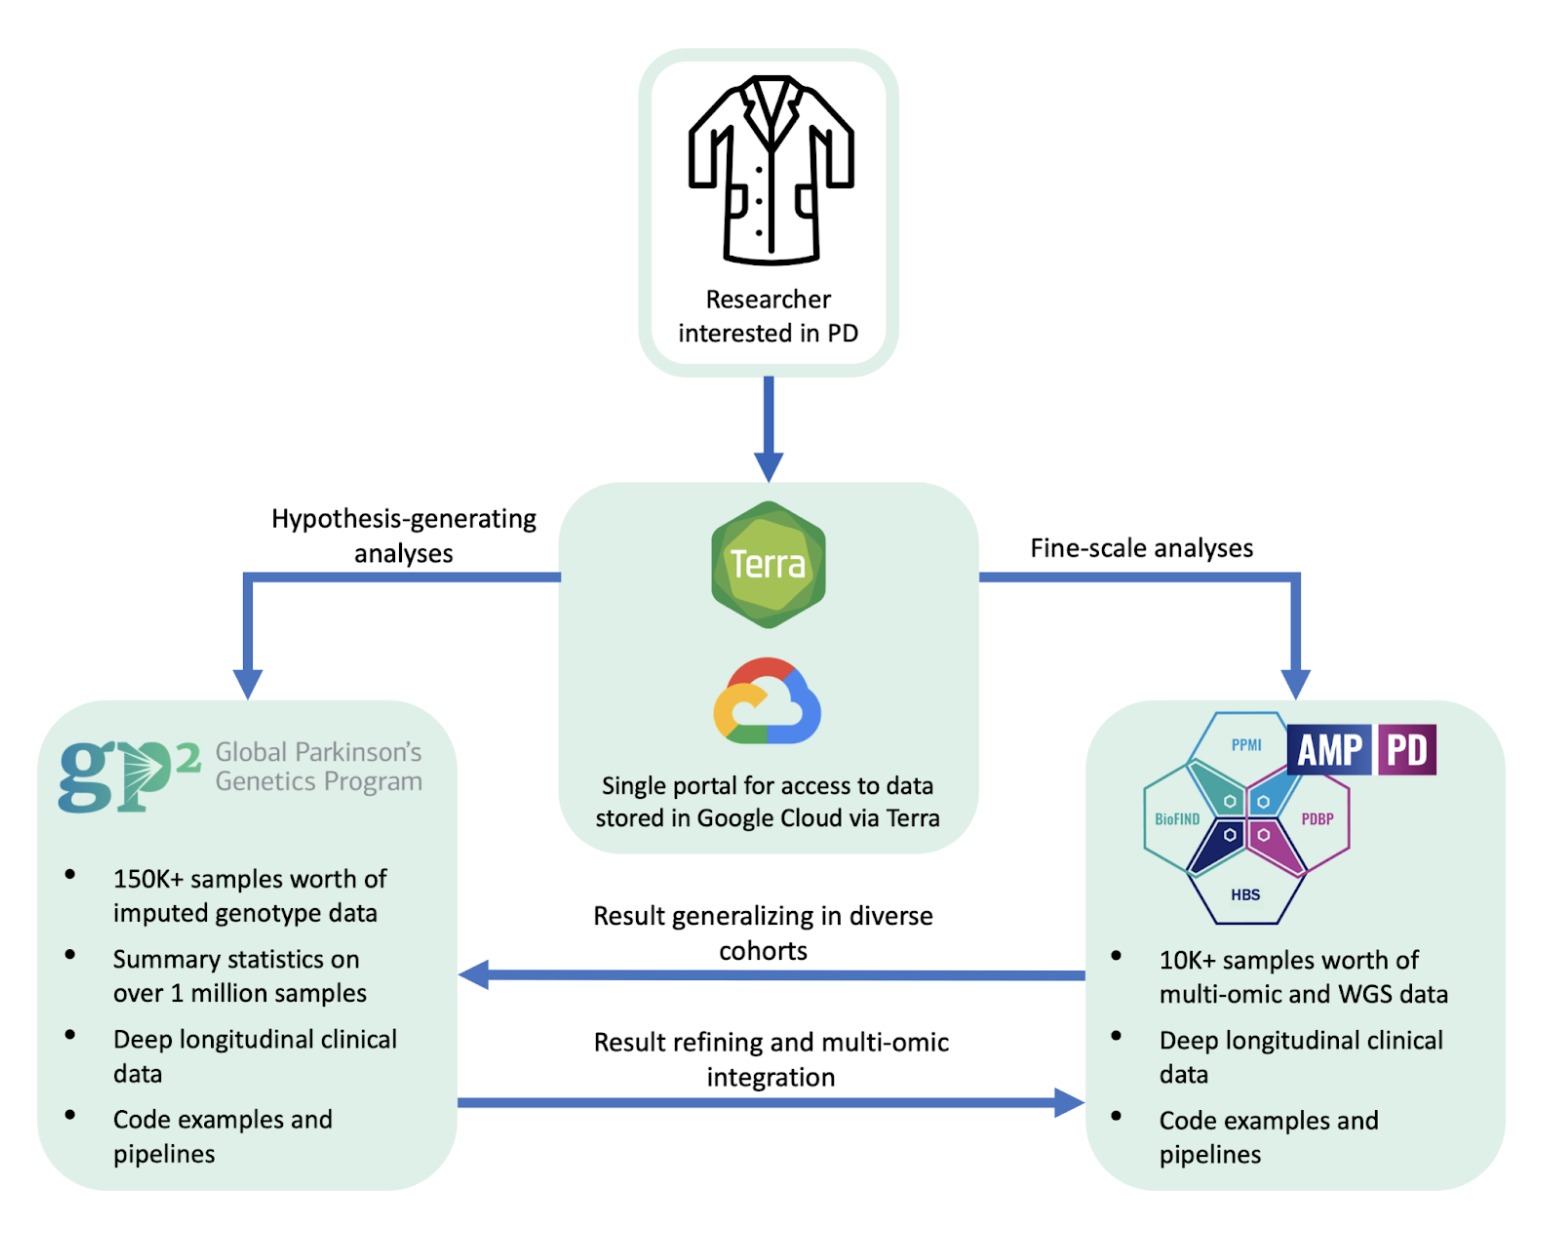

## Quick Overview Access of AMP-PD Data
> This is the data available for AMP-PD as of March 10 2022 (release 2.5)

- All data provided is GRCh38 (hg38)
- Sample QC is done, but keep in mind that related people and multiple ancestries are still present! You will need to filter those yourself.
- There are duplicates in the clinical data, due to the same person taking part in multiple studies. They were kept because different cohorts collect different information, but make sure duplicates are handled before analysis (they have, however, been removed from the WGS data).
- Check study recruitment arm. Studies like PPMI have recruitment arms that are enriched for things like LRRK2 mutation carriers - these can skew results so be careful.

### Paths to AMP-PD Buckets 
From AMP-PD's Getting Started workspaces

Raw files are stored in [Google Cloud Storage](https://cloud.google.com/storage/) buckets:

- [gs://amp-pd-data](https://console.cloud.google.com/storage/browser/amp-pd-data): Clinical data files and other participant metadata
- [gs://amp-pd-data-tier2](https://console.cloud.google.com/storage/browser/amp-pd-data-tier2): Clinically reported genetic mutations and other restricted-access participant metadata
- [gs://amp-pd-genomics](https://console.cloud.google.com/storage/browser/amp-pd-genomics): Whole Genome sequencing CRAMs, VCFs, and metrics files
- [gs://amp-pd-transcriptomics](https://console.cloud.google.com/storage/browser/amp-pd-transcriptomics): Transcriptomics FASTQs, BAMs, Quantification, and Feature Counts files for single samples and QC pools
- [gs://amp-pd-proteomics](https://console.cloud.google.com/storage/browser/amp-pd-proteomics): Proteomics preview release with eight unfiltered NPX files from four separate assays for matched Plasma and CSF samples
- More information here: https://amp-pd.org/data 


### AMP-PD Bucket Structure - Overview

In Tier 2, the structure looks like the following
```
{AMP_RELEASE_PATH} @ gs://amp-pd-data/releases/2021_v2-5release_0510
    ├── amp_pd_case_control.csv
    ├── amp_pd_participant_wgs_duplicates.csv
    ├── amp_pd_participants.csv
    ├── rna_sample_inventory.csv
    ├── wgs_gatk_joint_genotyping_samples.csv
    ├── wgs_sample_inventory.csv
    └── clinical/
            └── [58 files]
```



### AMP-PD Bucket Structure - Genetics 

In Tier 2, the structure for the genetics data looks like the following

```
{AMP_WGS_RELEASE_PATH} @ gs://amp-pd-genomics/releases/2021_v2-5release_0510/wgs/
    ├── wgs_qc_flags.csv
    ├── wgs_samples.csv
    ├── gatk/
    │   ├── metrics/
    │   │   ├── preBqsr_selfSM.tsv
    │   │   ├── raw_wgs_metrics.tsv
    │   │   ├── variant_calling_detail_metrics.tsv
    │   │   ├── variant_calling_summary_metrics.tsv
    │   │   └── wgs_metrics.tsv
    │   └── vcf/
    │       └── [72 files; suffixes *{.vcf.gz, .vcf.gz.tbi, .vcf.gz.idx}]
    ├── plink/
    │   ├── README.txt
    │   ├── bfiles/
    │   │   └── [76 files; suffixes *{.log, .bed, .bim, .fam}]
    │   └── pfiles/
    │       └── [76 files; suffixes *{.log, .pgen, .psam, .pvar}]
    │ 
    └── topmed/
        ├── minDP0.minAC1/
        │   └── [46 files; suffices *{.bcf, .bcf.csi}]
        ├── minDP10.minAC1/
        │   └── [46 files; suffices *{.bcf, .bcf.csi}]
        └── sites.minAC1/ 
            └── [46 files; suffices *{.bcf, .bcf.csi}]
```

## Quick Overview Access of GP2 Data
> This is the data available for **GP2 as of May 20 2022 (release 2)**. There are a total of 8644 samples in this release. For more details on what's available in this release, see the [blogpost here](https://gp2.org/the-components-of-gp2s-second-data-release/)

- New genotype samples were processed using GenoTools version 0.1 [https://github.com/dvitale199/GenoTools]
- All samples were imputed to TOPMed reference detailed in the GenoTools pipeline
- All data provided is GRCh38 (hg38)

### Paths to GP2 Buckets (Release 2)

Raw files are stored in [Google Cloud Storage](https://cloud.google.com/storage/) buckets:

#### Tier 1 
- [gs://gp2_tier1/release2_06052022](https://console.cloud.google.com/storage/browser/gp2tier1/release2_06052022): Tier 1 Bucket
- [gs://gp2_tier1/release2_06052022/summary_statistics/](https://console.cloud.google.com/storage/browser/gp2_tier1/release2_06052022/summary_statistics): Summary statistics 

#### Tier 2 
- [gs://gp2_tier2/release2_06052022/](https://console.cloud.google.com/storage/browser/gp2tier2/release2_06052022/): Tier 2 bucket
- [gs://gp2_tier2/release2_06052022/summary_statistics/](https://console.cloud.google.com/storage/browser/gp2tier2/release2_06052022/summary_statistics): Summary statistics 
- [gs://gp2_tier2/release2_06052022/raw_genotypes/](https://console.cloud.google.com/storage/browser/gp2tier2/release2_06052022/raw_genotypes): Raw genotypes (PLINKv2 files - pgen files broken down by ancestry)
- [gs://gp2_tier2/release2_06052022/imputed_genotypes/](https://console.cloud.google.com/storage/browser/gp2tier2/release2_06052022/imputed_genotypes): Imputed genotypes (PLINKv2 files - pgen files broken down by ancestry)
- [gs://gp2_tier2/release2_06052022/cnvs/](https://console.cloud.google.com/storage/browser/gp2tier2/release2_06052022/cnvs): Probabilistic estimates of copy number variation per gene 
- [gs://gp2_tier2/release2_06052022/clinical_data/](https://console.cloud.google.com/storage/browser/gp2tier2/release2_06052022/clinical_data/): Clinical data and dictionary 
- [gs://gp2_tier2/release2_06052022/meta_data/](https://console.cloud.google.com/storage/browser/gp2_tier2/release2_06052022/meta_data): Meta data (hdf5 file with QC, ancestry, principle components, etc)

### GP2 Bucket Structure - Overview

```
gp2_tier1
	└── summary_statistics/

gp2_tier2
	├── raw_genotypes/
	├── imputed_genotypes/
	├── cnvs/
	├── meta_data/
	├── clinical_data/
	└── summary_statistics/
```

Bucket and Directory Overview: 

- `gp2_tier1`, this is the bucket for summary statistics and other non-participant level data. The top level directories for this always correspond to each release, with a mirrored structure for each release.
    - `summary_statistics/` - The file META5_no23_with_rsids2.txt contains open access summary statistics from the most recent Parkinson’s GWAS (excluding 23andMe samples, from Nalls et al 2019, https://pubmed.ncbi.nlm.nih.gov/31701892/) can be found here as well as in the tier 2 storage bucket. Column headers conform to the standard METAL meta-analysis output [https://genome.sph.umich.edu/wiki/METAL_Documentation].


- `gp2_tier2`, this is the bucket for participant level data.  The top level directories for this always correspond to each release, with a mirrored structure for each release. Its content is mirrored below.
    - `raw_genotypes/` - PLINK binary files for each ancestry group for all samples passing quality control prior to imputation. Each PLINK binary includes all attempted variants from the array for that ancestry group. As a note, for flexibility in community analyses, all known duplicate samples were removed but related samples remain.
    - `imputed_genotypes/` - All genotype data has been imputed using the TOPMed reference panel and is contained in the PLINK2 files chr*.* Prior to upload, these files have been filtered for minor allele count > 10 and imputation quality > 0.3 as is industry standard. Each file set is separated by genetically defined ancestry groups prior to imputation. 
    - `cnvs/` - Probabilistic estimates of copy number variation per gene and +/- 250kb flanking regions for deletions, duplications and insertions for all samples. Code for these estimates can be found here [https://github.com/GP2code/GenoTools/tree/main/CNV]. This is currently “hypothesis generating” data and will be improved for next release
    - `meta_data/` - Meta data included in the HDF5 file GP2_round1.QC.metrics.h5 is currently comprised of QC, ancestry counts, ancestry labels, confusion matrix, new samples UMAP, projected principal components, pruned samples, reference principal component, reference UMAP, total (samples and reference) UMAP.
    - `clinical_data/` - The corresponding data dictionary for an explanation of the columns can be found in release1_29112021_data_dictionary.csv. 
    - `summary_statistics/` - this includes basic summary statistics from gp2_tier1
 
**for more information, please see Module 2 in this series!**

# Functions

## Load Libraries

In [1]:
# Use the os package to interact with the environment
import os
import sys

# Bring in Pandas for Dataframe functionality
import pandas as pd
from functools import reduce

# Bring some visualization functionality 
import seaborn as sns

# numpy for basics
import numpy as np

# Use StringIO for working with file contents
from io import StringIO

# Enable IPython to display matplotlib graphs
import matplotlib.pyplot as plt
%matplotlib inline

# Enable interaction with the FireCloud API
from firecloud import api as fapi

# Import the iPython HTML rendering for displaying links to Google Cloud Console
from IPython.core.display import display, HTML

# Import urllib modules for building URLs to Google Cloud Console
import urllib.parse

# BigQuery for querying data
from google.cloud import bigquery

## Create Python Functions to Interact With GCP/Terra
Terra is an intermediate platform, designed to help the user interact with the data placed in Google Cloud buckets.

In [2]:
# Utility routine for printing a shell command before executing it
def shell_do(command):
    print(f'Executing: {command}', file=sys.stderr)
    !$command
    
def shell_return(command):
    print(f'Executing: {command}', file=sys.stderr)
    output = !$command
    return '\n'.join(output)

# Utility routine for printing a query before executing it
def bq_query(query):
    print(f'Executing: {query}', file=sys.stderr)
    return pd.read_gbq(query, project_id=BILLING_PROJECT_ID, dialect='standard')

# Utility routine for display a message and a link
def display_html_link(description, link_text, url):
    html = f'''
    <p>
    </p>
    <p>
    {description}
    <a target=_blank href="{url}">{link_text}</a>.
    </p>
    '''

    display(HTML(html))

# Utility routines for reading files from Google Cloud Storage
def gcs_read_file(path):
    """Return the contents of a file in GCS"""
    contents = !gsutil -u {BILLING_PROJECT_ID} cat {path}
    return '\n'.join(contents)
    
def gcs_read_csv(path, sep=None):
    """Return a DataFrame from the contents of a delimited file in GCS"""
    return pd.read_csv(StringIO(gcs_read_file(path)), sep=sep, engine='python')

# Utility routine for displaying a message and link to Cloud Console
def link_to_cloud_console_gcs(description, link_text, gcs_path):
    url = '{}?{}'.format(
        os.path.join('https://console.cloud.google.com/storage/browser',
                     gcs_path.replace("gs://","")),
        urllib.parse.urlencode({'userProject': BILLING_PROJECT_ID}))

    display_html_link(description, link_text, url)

## Initialize Workspace Variables

In [3]:
# Set up billing project and data path variables
BILLING_PROJECT_ID = os.environ['GOOGLE_PROJECT']
WORKSPACE_NAMESPACE = os.environ['WORKSPACE_NAMESPACE']
WORKSPACE_NAME = os.environ['WORKSPACE_NAME']
WORKSPACE_BUCKET = os.environ['WORKSPACE_BUCKET']

WORKSPACE_ATTRIBUTES = fapi.get_workspace(WORKSPACE_NAMESPACE, WORKSPACE_NAME).json().get('workspace',{}).get('attributes',{})

## AMP-PD v2.5
## Explicitly define release v2.5 path 
AMP_RELEASE_PATH = 'gs://amp-pd-data/releases/2021_v2-5release_0510'
AMP_CLINICAL_RELEASE_PATH = f'{AMP_RELEASE_PATH}/clinical'

AMP_WGS_RELEASE_PATH = 'gs://amp-pd-genomics/releases/2021_v2-5release_0510/wgs'
AMP_WGS_RELEASE_PLINK_PATH = os.path.join(AMP_WGS_RELEASE_PATH, 'plink')
AMP_WGS_RELEASE_GATK_PATH = os.path.join(AMP_WGS_RELEASE_PATH, 'gatk')

## Print the information to check we are in the proper release and billing 
## This will be different for you, the user, depending on the billing project your workspace is on
print('Billing and Workspace')
print(f'Workspace Name: {WORKSPACE_NAME}')
print(f'Billing Project: {BILLING_PROJECT_ID}')
print(f'Workspace Bucket, where you can upload and download data: {WORKSPACE_BUCKET}')
print('')

print('AMP-PD v2.5')
print(f'Path to AMP-PD v2.5 Clinical Data: {AMP_CLINICAL_RELEASE_PATH}')
print(f'Path to AMP-PD v2.5 WGS Data: {AMP_WGS_RELEASE_PLINK_PATH}')
print('')

## GP2 v2.0
## Explicitly define release v2.0 path 
GP2_RELEASE_PATH = 'gs://gp2tier2/release2_06052022'
GP2_CLINICAL_RELEASE_PATH = f'{GP2_RELEASE_PATH}/clinical_data'
GP2_META_RELEASE_PATH = f'{GP2_RELEASE_PATH}/meta_data'
GP2_SUMSTAT_RELEASE_PATH = f'{GP2_RELEASE_PATH}/summary_statistics'

GP2_RAW_GENO_PATH = f'{GP2_RELEASE_PATH}/raw_genotypes'
GP2_IMPUTED_GENO_PATH = f'{GP2_RELEASE_PATH}/imputed_genotypes'
print('GP2 v2.0')
print(f'Path to GP2 v2.0 Clinical Data: {GP2_CLINICAL_RELEASE_PATH}')
print(f'Path to GP2 v2.0 Raw Genotype Data: {GP2_RAW_GENO_PATH}')
print(f'Path to GP2 v2.0 Imputed Genotype Data: {GP2_IMPUTED_GENO_PATH}')

Billing and Workspace
Workspace Name: GP2 Bioinformatics Course 2
Billing Project: terra-9b559320
Workspace Bucket, where you can upload and download data: gs://fc-c04486b2-8d7e-4359-a607-63643e9a7914

AMP-PD v2.5
Path to AMP-PD v2.5 Clinical Data: gs://amp-pd-data/releases/2021_v2-5release_0510/clinical
Path to AMP-PD v2.5 WGS Data: gs://amp-pd-genomics/releases/2021_v2-5release_0510/wgs/plink

GP2 v2.0
Path to GP2 v2.0 Clinical Data: gs://gp2tier2/release2_06052022/clinical_data
Path to GP2 v2.0 Raw Genotype Data: gs://gp2tier2/release2_06052022/raw_genotypes
Path to GP2 v2.0 Imputed Genotype Data: gs://gp2tier2/release2_06052022/imputed_genotypes
